In [212]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
importlib.reload(com)
import digicomms as com

# Signal Construction

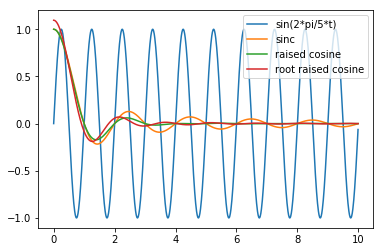

In [213]:
t = com.trange(1000,period=0.01)
t.apply(np.sin,scale=1/(2*np.pi)).plot(label= "sin(2*pi/5*t)")
t.apply(np.sinc).plot(label = "sinc")
t.apply(com.rcos).plot(label = "raised cosine")
t.apply(com.rrcos).plot(label = "root raised cosine")
plt.legend()

# Scaling

# Encoding

# Modifying Signals

## Apply a function to samples of a signal

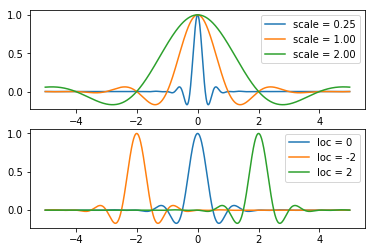

In [191]:
t = com.id(1000,period=1/100,start=-5) 
fig, axes = plt.subplots(2)
for scale in [1/4,1,2]:
    label = r"scale = {:<.2f}".format(scale)
    x = t.apply(com.rcos,scale=scale)
    x.plot(ax = axes[0],label=label)
for loc in [0,-2,2]:
    label = r"loc = {}".format(loc)
    x = t.apply(com.rcos,loc=loc,scale=.5)
    x.plot(ax=axes[1],label=label)
for ax in axes: ax.legend()

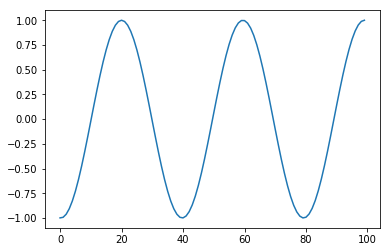

In [126]:
t.apply(np.cos,scale=2*np.pi,loc=20).plot()

## Convolving Signals

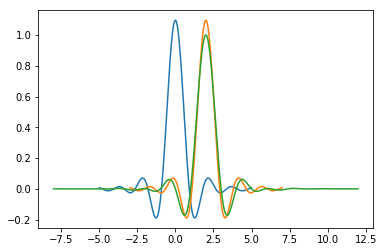

In [216]:
n_samples = 1000
period = 0.01
start = -n_samples/2 * period
t = com.id(n_samples,period,start)
x = t.apply(com.rrcos)
h = x.matched_filter(symbol_period = 2.0)
y = x.convolve(h)
x.plot()
h.plot()
y.plot()
